# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


example: https://github.com/username/exercise_name

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [256]:
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn import datasets
%matplotlib inline 
warnings.warn("ignore")



/var/folders/3q/9n9mn_1x03zcn6303bs2v4h40000gn/T/ipykernel_7540/938066907.py:9: UserWarning: ignore
  warnings.warn("ignore")


In [257]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.
class Ols(object):
  def __init__(self):
    self.w = None
    
  @staticmethod
  def pad(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])
    
  def fit(self, X, Y):
    X = Ols.pad(X)
    self.w = np.linalg.pinv(X.T @ X) @ X.T @ Y
  
  def predict(self, X):
    X = Ols.pad(X)
    return X @ self.w
      
  def score(self, Y, Y_pred):
    #MSE 
    return np.mean((Y - Y_pred)**2)
  
  def r_2(self, Y, Y_pred):
    #R2
    return 1 - np.mean((Y - Y_pred)**2)/np.var(Y)

The training MSE is:  21.894831181729202


Text(0, 0.5, 'Predicted')

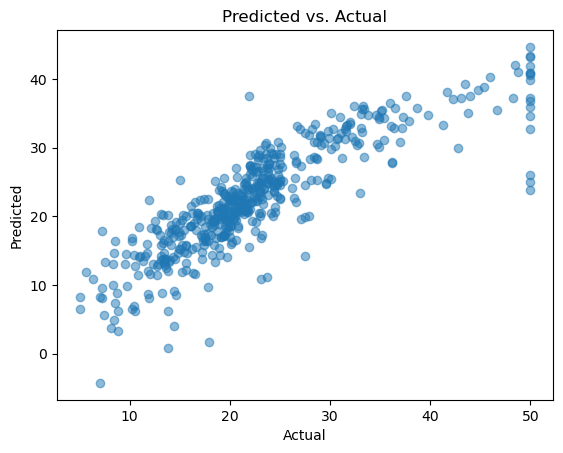

In [260]:
boston = datasets.load_boston();
x, y = boston.data, boston.target

#n is the number of samples n = x.shape[0] 
#P is the number of features p = x.shape[1] 

model_ols = Ols()
model_ols.fit(x,y) 
Train_MSE = model_ols.score(y, model_ols.predict(x))
print("The training MSE is: ", Train_MSE)

results = model_ols.predict(x)
plt.scatter(y, results, alpha=0.5)
plt.title("Predicted vs. Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")



In [266]:
# Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test?  

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import ShuffleSplit 

Shuffle = ShuffleSplit(n_splits=20, test_size=0.25)
error_train = []
error_test = [] 
iteration = 0

for train_index, test_index in Shuffle.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = Ols() 
    model.fit(x_train, y_train)
    error_train.append(model.score(y_train, model.predict(x_train)))
    error_test.append(model.score(y_test, model.predict(x_test)))
    print("Iteration: ", iteration, "Train MSE: ", error_train[iteration], "Test MSE: ", error_test[iteration])
    iteration += 1
    
    
print("The average MSE for train is: ", np.mean(error_train)) 
print("The average MSE for test is: ", np.mean(error_test))

Iteration:  0 Train MSE:  20.59673741260323 Test MSE:  27.892682293845873
Iteration:  1 Train MSE:  22.7430102480265 Test MSE:  20.461571066738365
Iteration:  2 Train MSE:  22.62065972676124 Test MSE:  20.56940885909253
Iteration:  3 Train MSE:  20.675474230530163 Test MSE:  26.544951442250852
Iteration:  4 Train MSE:  18.884623183738462 Test MSE:  31.959791562152066
Iteration:  5 Train MSE:  20.623408628638884 Test MSE:  26.3459218794017
Iteration:  6 Train MSE:  22.173857413729255 Test MSE:  21.989612882502787
Iteration:  7 Train MSE:  20.080335588228607 Test MSE:  28.316305091472525
Iteration:  8 Train MSE:  21.2490315126256 Test MSE:  24.777960139988075
Iteration:  9 Train MSE:  19.886938985066713 Test MSE:  30.290979783128936
Iteration:  10 Train MSE:  23.635244155468122 Test MSE:  18.591945656069793
Iteration:  11 Train MSE:  21.65986602947017 Test MSE:  23.651995439842963
Iteration:  12 Train MSE:  22.566674885187997 Test MSE:  21.108116278043287
Iteration:  13 Train MSE:  17.44

In [267]:
from scipy.stats import ttest_rel 

print("The p-value is: ", ttest_rel(error_train, error_test)[1]) 
print("The t-statistic is: ", ttest_rel(error_train, error_test)[0]) 
print("The difference between the two MSE is: ", np.mean(error_test) - np.mean(error_train))

#P-value is less than 0.05, so we reject the null hypothesis that the two MSE are the same. 


The p-value is:  0.0011549123415264962
The t-statistic is:  -3.820330721804579
The difference between the two MSE is:  5.093236994297431


In [268]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    self.mean = None
    self.std = None

  def fit(self, X):
    self.mean = np.mean(X, axis=0)
    self.std = np.std(X, axis=0)
    return self
  
  def predict(self, X):
    return (X - self.mean)/self.std
    
class OlsGd(Ols):
  
  def __init__(self, learning_rate=.05, num_iteration=1000, normalize=True, early_stop=True, verbose=True):
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()    
    self.verbose = verbose
    self.loss = [] 
    
  def _fit(self, X, Y, reset=True, track_loss=True):
    x = self.normalizer.fit(X).predict(X) if self.normalize else X
    x = self.pad(x)
    self.w = np.random.randn(x.shape[1]) 
    iters_no_improvement = 0 
    best_loss = self.loss_func(Y, x @ self.w)
    for i in range(self.num_iteration): 
      y_pred = x @ self.w 
      self.loss.append(self.loss_func(Y, y_pred))
      loss = self.loss_func(Y, y_pred)
      
      if loss >= best_loss:
        iters_no_improvement += 1
      else:
        iters_no_improvement = 0
        best_loss = loss
      # Check if need to early stop
      if iters_no_improvement > 20 and self.early_stop:
        print(f"Early stopping after {i} iterations due to early stop!")
        break
    
      # Print iteration log if verbose=True
      if self.verbose:
        print(f'Iteration number {i} - Loss: {loss}')
      self.w = self.w - self._step(x, Y)
      
  def _predict(self, X):
    x = self.normalizer.fit(X).predict(X) if self.normalize else X
    x = self.pad(x)
    return x @ self.w
    
  def loss_func(self, y, y_pred): 
    return np.mean((y - y_pred)**2)
      
  def _step(self, X, Y):
    gradian = 2*X.T @ (X @ self.w - Y) / X.shape[0]
    return self.learning_rate * gradian 

In [269]:
x, y = boston.data, boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
ols_gd = OlsGd(learning_rate=0.05, num_iteration=1000, verbose=False)
ols_gd._fit(x_train, y_train)
results = ols_gd._predict(x_test) 
print("The MSE for test is: ", ols_gd.score(y_test, results))
print("The MSE for train is: ", ols_gd.score(y_train, ols_gd._predict(x_train)))

The MSE for test is:  23.95205655853084
The MSE for train is:  21.33692320706274
The loss is:  23.95205655853084


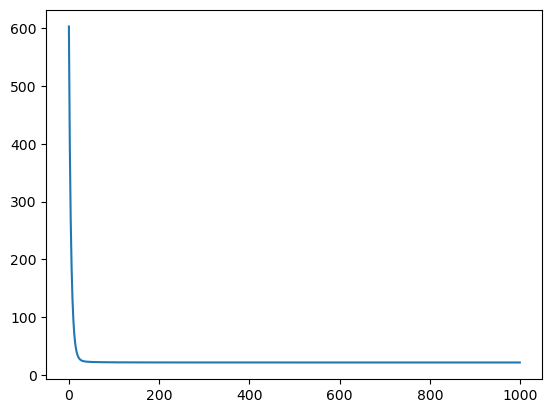

In [270]:
#plot the loss function convergence 
plt.plot(ols_gd.loss)
#we can see that the loss function converges to a minimum after 100 iterations. 

Text(0.5, 1.0, 'Actual vs Predicted Values of OLS Gradient Descent')

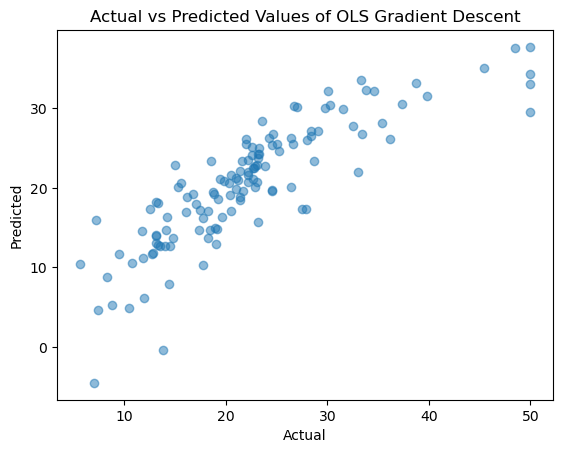

In [281]:
plt.scatter(y_test, results, alpha=0.5) 
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values of OLS Gradient Descent")

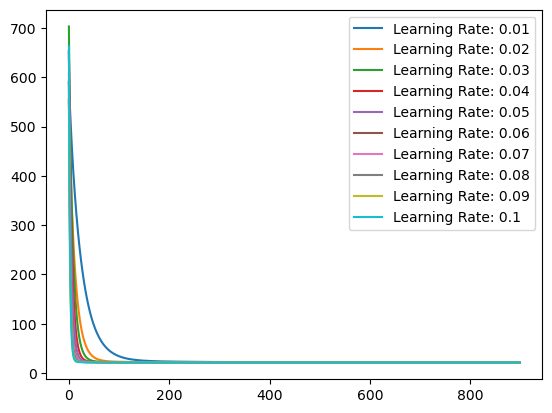

In [271]:
alpahs = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

for learning_rate in alpahs: 
  MSE = []
  for iter in range(100, 1000, 100): 
    ols_gd = OlsGd(learning_rate=learning_rate, num_iteration=iter, verbose=False)
    ols_gd._fit(x_train, y_train)
    results = ols_gd._predict(x_test) 
  plt.plot(ols_gd.loss, label='Learning Rate: ' + str(learning_rate))
  plt.legend() 
#We can see that the MSE is decreasing with the number of iterations. 


#Question: What is the effect of learning rate?  
#Answer: The learning rate is the step size of the gradient descent. 
# If the learning rate is too big, the gradient descent will not converge. If the learning rate is too small, the gradient descent will take a lot of iterations to converge. 
#Question: How would you find number of iteration automatically? 
#Answer: We can use early stopping. We can stop the gradient descent when the loss function is not decreasing anymore. 
#Question:Gradient Descent does not work well when features are not scaled evenly (why?!).
#Answer: Because the gradient descent will take a lot of iterations to converge. 


## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$ 

## Answer: 

#### Let's start with the loss function: 

L(y, y_hat) = (y - y_hat)^2 + lambda * w^2  = (y - x*w)^2 + lambda * w^2 = (y - x*w).T * (y - x*w) + lambda * w^2 = y.T * y - y.T*x*w - w.T*x.T*y + w.T*x.T*x*w + lambda * w^2 = y.T * y - 2*y.T*x*w + w.T*x.T*x*w + lambda * w^2 

#### Now Let's take the derivative of the loss function with respect to w: 

L'(w) = -2*x.T*y + 2*x.T*x*w + 2*lambda*w = 0 

### Solving for w: 

#### -2*x.T*y + 2*x.T*x*w + 2*lambda*w = 0  =>  
#### -2*x.T*y + 2*x.T*x*w = -2*lambda*w  => 
#### -x.T*y + x.T*x*w = -lambda*w  => 
#### x.T*x*w = x.T*y + lambda*w  => 
#### w = (x.T*x + lambda*I)^-1 * x.T*y 

In [282]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
  
    
  def _fit(self, X, Y):
    # update the fit function to include the ridge regression using W = (X^T X + lambda I)^-1 X^T Y 
    X = self.pad(X)
    self.w = np.linalg.inv(X.T @ X + self.ridge_lambda * np.eye(X.shape[1])) @ X.T @ Y 
    
  def _predict(self, X):
    X = self.pad(X)
    return X @ self.w 
  
  def loss_ridge(self, y, y_pred, w): 
    return np.sum((y - y_pred)**2) + self.ridge_lambda * w.T @ w
      
      
      
class RidgeLs_GD(OlsGd):
    def __init__(self, ridge_lambda, *wargs, **kwargs):
      super(RidgeLs_GD,self).__init__(*wargs, **kwargs)
      self.ridge_lambda = ridge_lambda
    
    def _fit(self, X, Y):
        X = self.normalizer.fit(X).predict(X) if self.normalize else X
        X = self.pad(X)
        self.w = np.random.randn(X.shape[1])
        iters_no_improvement = 0 
        best_loss = self.loss_ridge(Y, X @ self.w, self.w)
        for i in range(self.num_iteration): 
          y_pred = X @ self.w 
          self.loss.append(self.loss_ridge(Y, y_pred, self.w))
          loss = self.loss_ridge(Y, y_pred, self.w)
          if loss >= best_loss:
                iters_no_improvement += 1
          else:
            iters_no_improvement = 0
            best_loss = loss
          # Check if need to early stop
          if iters_no_improvement > 20 and self.early_stop:
            print(f"Early stopping after {i} iterations due to early stop!")
            break 
          if self.verbose:
            print(f'Iteration number {i} - Loss: {loss}')
          self.w = self.w - self._step_ridge(X, Y)
            
    def _predict(self, X):
          X = self.normalizer.fit(X).predict(X) if self.normalize else X
          X = self.pad(X)
          return X @ self.w 
    
    def _step_ridge(self, X, Y):
        gradian = (X.T @ (X @ self.w - Y) + self.ridge_lambda * self.w) / X.shape[0]
        return self.learning_rate * gradian
      
    def loss_ridge(self, y, y_pred, w):
        return np.sum((y - y_pred)**2) + self.ridge_lambda * w.T @ w

In [283]:
Ridge = RidgeLs(ridge_lambda=0.1) 
Ridge._fit(x_train, y_train) 
results = Ridge._predict(x_test) 
print("The MSE for test is: ", Ridge.score(y_test, results))

The MSE for test is:  24.07219738696377


In [284]:
Ridge_GD = RidgeLs_GD(ridge_lambda=0.1, learning_rate=0.05, num_iteration=1000, verbose=False) 
Ridge_GD._fit(x_train, y_train) 
results = Ridge_GD._predict(x_test) 
print("The MSE for test is: ", Ridge_GD.score(y_test, results))

The MSE for test is:  23.968321428646227


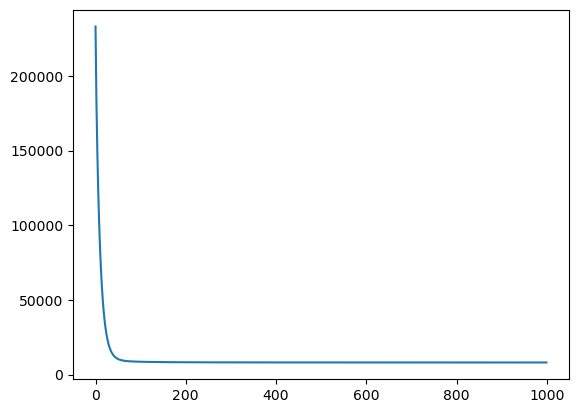

In [285]:
plt.plot(Ridge_GD.loss) #we can see that the loss function converges to a minimum after 100 iterations. 

Text(0.5, 1.0, 'True Values vs Predictions for Ridge Regression using Gradient Descent')

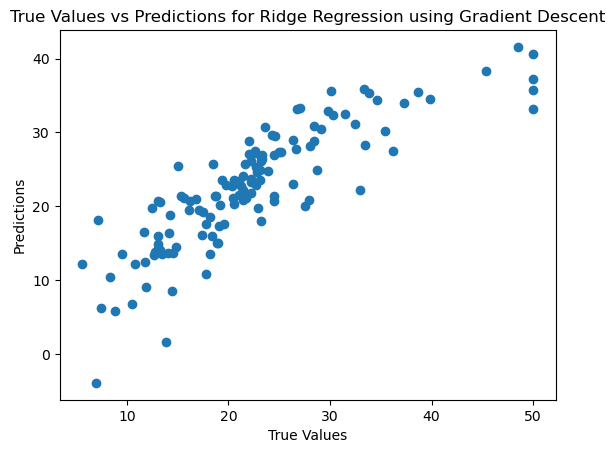

In [286]:
plt.scatter(y_test, results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions for Ridge Regression using Gradient Descent')

### Use scikitlearn implementation for OLS, Ridge and Lasso

In [276]:
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LinearRegression 


Ridge_sk = Ridge(alpha=0.1) 
Ridge_sk.fit(x_train, y_train) 
print("The MSE for Ridge test is: ", mean_squared_error(y_test, Ridge_sk.predict(x_test)))

Lasso_sk = Lasso(alpha=0.1) 
Lasso_sk.fit(x_train, y_train) 
print("The MSE for Lasso test is: ", mean_squared_error(y_test, Lasso_sk.predict(x_test)))

Linear_sk = LinearRegression() 
Linear_sk.fit(x_train, y_train)
print("The MSE for Linear test is: ", mean_squared_error(y_test, Linear_sk.predict(x_test)))



The MSE for Ridge test is:  24.398573214041168
The MSE for Lasso test is:  25.70835050391164
The MSE for Linear test is:  24.368503173090936
